# Clustering
For the clustering analysis we used DBSCAN and K-Means to study our data, in particular the relationship between depression and stress. Something we wanted to look at is the clustering in three dimensions, using depression, anxiety and stress.

This analysis allowed us to group students into clusters, providing a clearer understanding of how these mental health factors interact and vary across the dataset. 


## Imports

In [124]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn import cluster
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_score


In [125]:
data = pd.read_csv('Preprocessed.csv')

In [126]:
data.head()

,Age,Gender,University,Department,Year,Current CGPA,Stress value,Anxiety value,Depression value
0,18-22,Female,"Independent University, Bangladesh (IUB)",Engineering - CS,2,2.50 - 2.99,0.760870,0.716667,0.712121
1,18-22,Male,"Independent University, Bangladesh (IUB)",Engineering - CS,3,3.00 - 3.39,0.684783,0.550000,0.712121
2,18-22,Male,American International University Bangladesh (...,Engineering - CS,3,3.00 - 3.39,0.010870,0.000000,0.000000
3,18-22,Male,American International University Bangladesh (...,Engineering - CS,3,3.00 - 3.39,0.489130,0.483333,0.478788
4,18-22,Male,North South University (NSU),Engineering - CS,2,2.50 - 2.99,0.804348,0.633333,0.769697


In [127]:
data.describe()

,Year,Stress value,Anxiety value,Depression value
count,2028.000000,2028.000000,2028.000000,2028.000000
mean,2.311144,0.585038,0.585585,0.529380
std,1.190877,0.198531,0.260009,0.249647
min,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.456522,0.383333,0.333333
50%,2.000000,0.586957,0.600000,0.527273
75%,3.000000,0.750000,0.800000,0.715152
max,4.000000,1.000000,1.000000,1.000000


## K-Means

We decided to make a cluster analysis between Depression and Anxiety.

### Elbow Method
We use the Elbow Method to determine the optimal number of clusters for K-Means. This is done by plotting the sum of squared errors (SSE) against the number of clusters.

Text(0, 0.5, 'SSE')

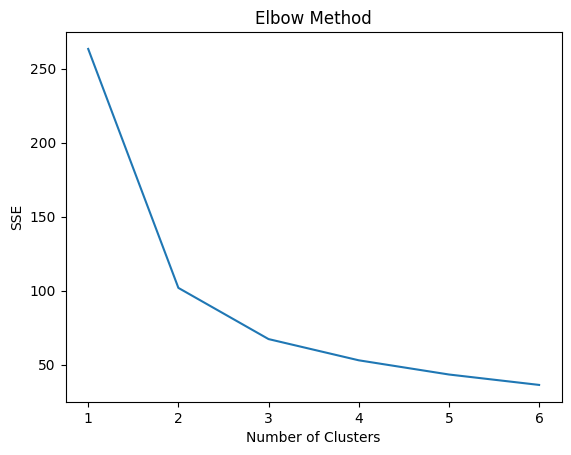

In [128]:
num_clusters = [1,2,3,4,5,6]
SSE = []

for k in num_clusters:
    k_means = cluster.KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=0)
    k_means.fit(data[['Depression value', 'Anxiety value']])
    SSE.append(k_means.inertia_)

plt.plot(num_clusters, SSE)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')

**Conclusion**: Based on the Elbow Method, the optimal number of clusters appears to be **3**, as the SSE curve shows a significant drop and then plateaus beyond this point.

### Doing the K-Means Clustering

In [130]:
kmeans = cluster.KMeans(n_clusters=3, init="k-means++", n_init = 10)
kmeans = kmeans.fit(data[['Depression value', 'Anxiety value']])
kmeans.cluster_centers_

array([[0.26599018, 0.29882773],
       [0.80760527, 0.86791126],
       [0.5305269 , 0.60356201]])

### Assign Cluster Labels
We add the cluster labels from K-Means to the DataFrame for further analysis.

In [131]:
data['Cluster number'] = kmeans.labels_

In [132]:
data.head()

,Age,Gender,University,Department,Year,Current CGPA,Stress value,Anxiety value,Depression value,Cluster number
0,18-22,Female,"Independent University, Bangladesh (IUB)",Engineering - CS,2,2.50 - 2.99,0.760870,0.716667,0.712121,1
1,18-22,Male,"Independent University, Bangladesh (IUB)",Engineering - CS,3,3.00 - 3.39,0.684783,0.550000,0.712121,2
2,18-22,Male,American International University Bangladesh (...,Engineering - CS,3,3.00 - 3.39,0.010870,0.000000,0.000000,0
3,18-22,Male,American International University Bangladesh (...,Engineering - CS,3,3.00 - 3.39,0.489130,0.483333,0.478788,2
4,18-22,Male,North South University (NSU),Engineering - CS,2,2.50 - 2.99,0.804348,0.633333,0.769697,1


<Axes: xlabel='Depression value', ylabel='Anxiety value'>

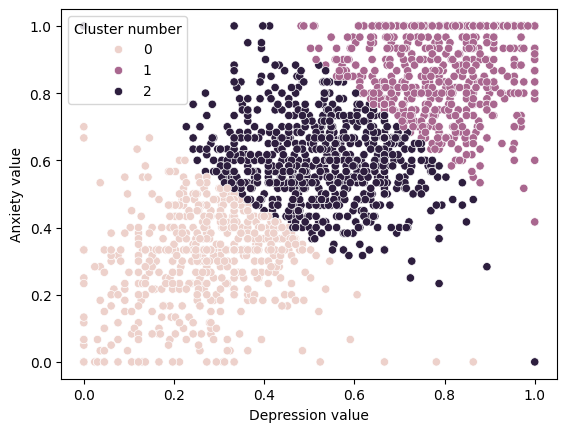

In [133]:
sns.scatterplot(data=data, x='Depression value', y='Anxiety value', hue='Cluster number')

### Silhouette Analysis for K-Means
To further evaluate the quality of the clusters, we used Silhouette Analysis, which helps determine the optimal number of clusters. The Silhouette Score ranges from -1 to 1, where a higher score indicates better-defined clusters.

We tested different numbers of clusters (from 2 to 6) and computed the Silhouette Score for each:

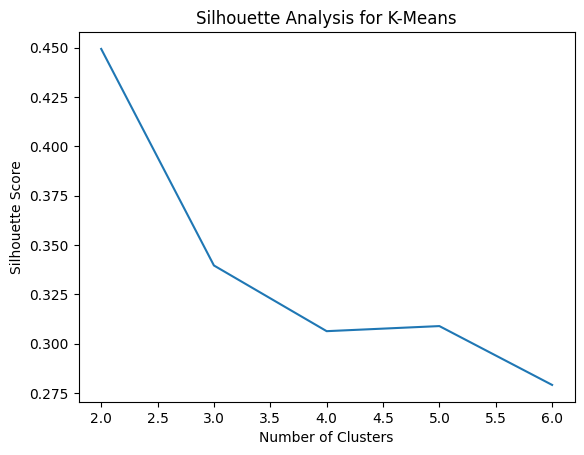

Silhouette Score for K-Means (2D): 0.3751


In [129]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
for k in range(2, 7):
    k_means = cluster.KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=0)
    k_means.fit(data[['Depression value', 'Stress value', 'Anxiety value']])
    labels = k_means.labels_
    silhouette_scores.append(silhouette_score(data[['Depression value', 'Stress value', 'Anxiety value']], labels))

plt.plot(range(2, 7), silhouette_scores)
plt.title('Silhouette Analysis for K-Means')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

silhouette_avg = silhouette_score(data[['Depression value', 'Anxiety value']], kmeans.labels_)
print(f"Silhouette Score for K-Means (2D): {silhouette_avg:.4f}")


From the plot and analysis, we observe that the Silhouette Score is highest when using 2 clusters, which suggests that this configuration provides the best separation between clusters in terms of cohesion and distance.

**Reconciling with the Elbow Method**

* The Elbow Method suggests that 3 clusters are optimal due to the point where the Sum of Squared Errors (SSE) begins to plateau, indicating that adding more clusters yields diminishing returns.

* On the other hand, the Silhouette Analysis suggests 2 clusters due to the highest Silhouette Score, indicating better-defined clusters in this configuration.

**Final Decision**

After considering both methods:

* The Elbow Method indicates that 3 clusters might provide a more granular segmentation, revealing potential subgroups that could be missed with only 2 clusters.

* Although the Silhouette Score suggests 2 clusters for optimal separation, we chose to use 3 clusters because it offers more detailed insights into the data.

Thus, 3 clusters were selected for further analysis to capture additional patterns in the data, while still keeping in mind the Silhouette Score's suggestion for fewer clusters.

## DBSCAN

DBSCAN is another clustering algorithm that is useful for identifying clusters based on density rather than centroid distance. We use DBSCAN to cluster the data based on the features of Depression and Anxiety.

In [134]:
data.head()

,Age,Gender,University,Department,Year,Current CGPA,Stress value,Anxiety value,Depression value,Cluster number
0,18-22,Female,"Independent University, Bangladesh (IUB)",Engineering - CS,2,2.50 - 2.99,0.760870,0.716667,0.712121,1
1,18-22,Male,"Independent University, Bangladesh (IUB)",Engineering - CS,3,3.00 - 3.39,0.684783,0.550000,0.712121,2
2,18-22,Male,American International University Bangladesh (...,Engineering - CS,3,3.00 - 3.39,0.010870,0.000000,0.000000,0
3,18-22,Male,American International University Bangladesh (...,Engineering - CS,3,3.00 - 3.39,0.489130,0.483333,0.478788,2
4,18-22,Male,North South University (NSU),Engineering - CS,2,2.50 - 2.99,0.804348,0.633333,0.769697,1


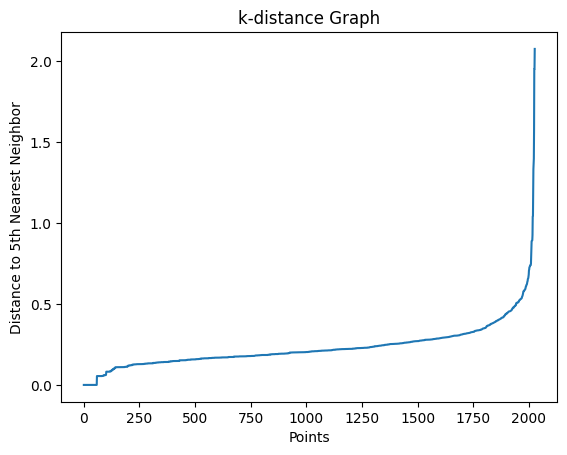

In [135]:
data_normalized = data[['Depression value', 'Anxiety value', 'Stress value']]
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_normalized)

k = 5
neighbors = NearestNeighbors(n_neighbors=k)
neighbors_fit = neighbors.fit(data_scaled)
distances, indices = neighbors_fit.kneighbors(data_scaled)

distances = np.sort(distances[:, k-1], axis=0)
plt.plot(distances)
plt.title('k-distance Graph')
plt.xlabel('Points')
plt.ylabel('Distance to 5th Nearest Neighbor')
plt.show()

The "elbow" in the k-distance graph helps us determine the optimal `eps` value for DBSCAN. We further optimize both `eps` and `min_samples` to maximize the silhouette score.

Best eps: 1.5
Best min_samples: 3
Best silhouette score: 0.4568


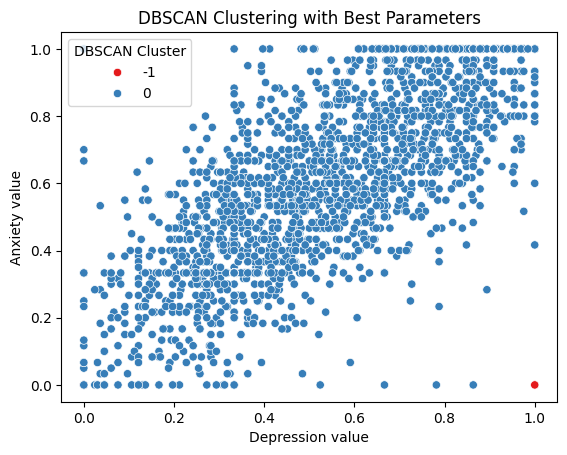

In [136]:

eps_values = np.linspace(0.1, 1.5, 15)
min_samples_values = [3, 4, 5, 6, 7, 8, 10]

best_score = -1
best_eps = None
best_min_samples = None
best_labels = None

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(data_scaled)
        if len(set(labels)) == 1:
            continue
        if len(set(labels)) > 1:
            score = silhouette_score(data_scaled, labels)
            if score > best_score:
                best_score = score
                best_eps = eps
                best_min_samples = min_samples
                best_labels = labels

print(f"Best eps: {best_eps}")
print(f"Best min_samples: {best_min_samples}")
print(f"Best silhouette score: {best_score:.4f}")

data['DBSCAN Cluster'] = best_labels
sns.scatterplot(data=data, x='Depression value', y='Anxiety value', hue='DBSCAN Cluster', palette='Set1')
plt.title("DBSCAN Clustering with Best Parameters")
plt.xlabel("Depression value")
plt.ylabel("Anxiety value")
plt.show()

**Conclusion:**

- DBSCAN clustering was attempted, but the clusters formed were not well-separated and did not align with the data patterns. This method is not the best fit for this dataset.
- While the silhouette score was relatively lower, this method may be preferred for datasets with irregular cluster shapes or noise.

## K-Means++

We now perform clustering in three dimensions (Depression, Stress, and Anxiety values) to analyze groupings in multi-dimensional space.

Searching best number of clusters using the Elbow Method

Text(0, 0.5, 'SSE')

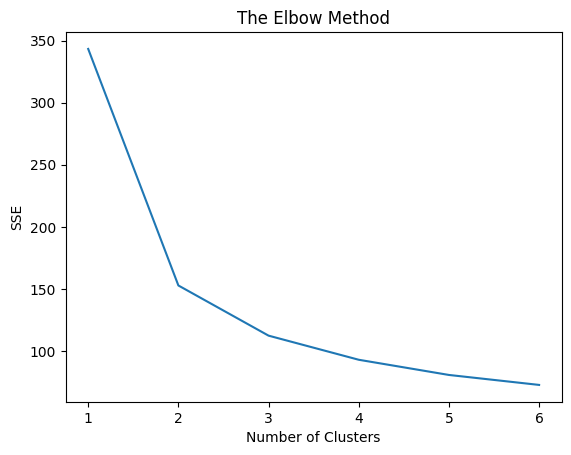

In [137]:
num_clusters = [1,2,3,4,5,6]
SSE = []
for k in num_clusters:
    k_means = cluster.KMeans(n_clusters=k, init='k-means++',random_state=0, n_init=10)
    k_means.fit(data[['Depression value', 'Stress value', 'Anxiety value']])
    SSE.append(k_means.inertia_)

plt.plot(num_clusters, SSE)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')

Again, the Elbow Method suggests using 3 clusters as the optimal number.

In [138]:
kmeans_3d = cluster.KMeans(n_clusters=3, init="k-means++", n_init = 10)
kmeans_3d = kmeans.fit(data[['Depression value', 'Stress value', 'Anxiety value']])
kmeans_3d.cluster_centers_

data['Cluster number'] = kmeans.labels_

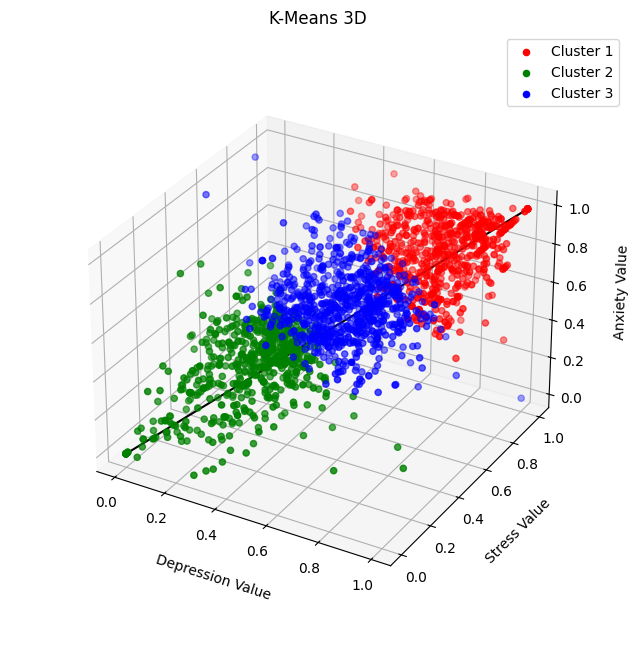

In [139]:
plt.figure(figsize=(10, 8))
kplot = plt.axes(projection='3d')

xline = np.linspace(0, 1, 1000)
yline = np.linspace(0, 1, 1000)
zline = np.linspace(0, 1, 1000)

kplot.plot3D(xline, yline, zline, 'black')

cluster1 = data[data['Cluster number'] == 0]
cluster2 = data[data['Cluster number'] == 1]
cluster3 = data[data['Cluster number'] == 2]

kplot.scatter3D(cluster1["Depression value"], cluster1["Stress value"], cluster1["Anxiety value"], c='red', label='Cluster 1')
kplot.scatter3D(cluster2["Depression value"], cluster2["Stress value"], cluster2["Anxiety value"], c='green', label='Cluster 2')
kplot.scatter3D(cluster3["Depression value"], cluster3["Stress value"], cluster3["Anxiety value"], c='blue', label='Cluster 3')

kplot.set_xlabel("Depression Value", labelpad=15)
kplot.set_ylabel("Stress Value", labelpad=15)
kplot.set_zlabel("Anxiety Value", labelpad=15)

plt.legend()
plt.title("K-Means 3D")
kplot.set_box_aspect(None, zoom=0.85)


## Conclusion

In this clustering analysis, we explored two clustering algorithms, K-Means and DBSCAN to study the relationships between depression, anxiety, and stress.

1. **K-Means Clustering**:
   - We used the Elbow Method to determine the optimal number of clusters, which suggested 3 clusters as the ideal choice based on the sum of squared errors (SSE).
   - Silhouette Analysis, which evaluates cluster separation, indicated that 2 clusters might offer better cohesion and separation. However, we decided to proceed with 3 clusters to capture better the subgroups.
   - After performing K-Means clustering on the depression and anxiety values, we observed clear groupings in the 2D scatter plot. When extending the analysis to 3D, including depression, stress, and anxiety, the three clusters remained distinct, providing a more comprehensive view of how these mental health factors interact in students.

2. **DBSCAN Clustering**:
   - DBSCAN, which clusters based on density, did not perform as well for this dataset. The clusters formed were not well-separated and did not align with the data patterns.

Something that was interesting to see is the realtionship between the clusters, the amount of students with high anxiety, high depression and high stress is greater that the ones who don't.